### Name: Apurva Bhujbal
### Task: 1 Predict the percentage of marks of a student based on the number of study hours.
### Q: What will be the predicted score if a student studies for 9.25 hours/day?


### Importing dependencies:

In [255]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [256]:
data=pd.read_csv("ML1")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [257]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [258]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [259]:
data.shape

(25, 2)

In [260]:
print(data.isnull().sum())
print("We dont have null values")

Hours     0
Scores    0
dtype: int64
We dont have null values


### To check the relationship between the variables:

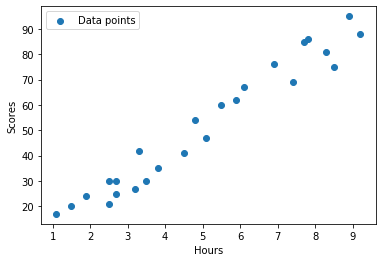

From the plot we can say that there exist a linear relationship between the variables.


In [253]:
plt.scatter(data.Hours,data.Scores,label="Data points")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.legend()
plt.show()
print("From the plot we can say that there exist a linear relationship between the variables.")

In [236]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Model:

In [238]:
train=np.array(data[["Hours"]])
test=np.array(data[["Scores"]])

In [239]:
x_train,x_test,y_train,y_test=train_test_split(train, test, test_size=0.2, random_state=0)
print(f"The size of train data and test data is {x_train.size,y_train.size,x_test.size,y_test.size}")

The size of train data and test data is (20, 20, 5, 5)


In [240]:
reg=LinearRegression()

In [241]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [242]:
pred=reg.predict(x_test)

In [243]:
m=reg.coef_
print("The value of m in the equation is:",m[0][0])

The value of m in the equation is: 9.910656480642237


In [244]:
c=reg.intercept_
print("The value of m in the equation is:",c[0])

The value of m in the equation is: 2.018160041434683


### Plotting the model:

In [245]:
line=reg.coef_*train+reg.intercept_
print(line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


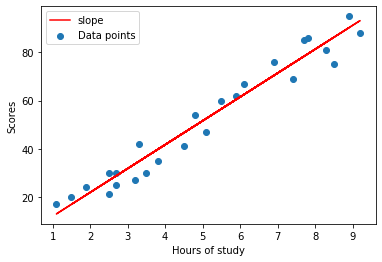

In [246]:
plt.scatter(train,test,label="Data points")
plt.plot(train,line,color="red",label="slope")
plt.xlabel("Hours of study")
plt.ylabel("Scores")
plt.legend()
plt.show()

### Checking the accuracy of our model:

In [247]:
print("The accuracy of the model is:",reg.score(x_test,y_test))
mae=mean_absolute_error(y_test,pred)
print("The mean absolute error of the model is:",mae)

The accuracy of the model is: 0.9454906892105356
The mean absolute error of the model is: 4.183859899002975


### Testing of the model:

### What will be predicted score if a student studies for 9.25 hours/day?

In [254]:
hours=np.array(9.25)
pred2=reg.predict([[hours]])
print("If a student studies for",hours,"hours/day, the predicted marks will be:",pred2[0][0])

If a student studies for 9.25 hours/day, the predicted marks will be: 93.69173248737538
